### Data Reading and Stroing into pandas DataFrame 

In [29]:
# PIL short for pillow library is imaging library which allow us to create image form vector of pixal values either in grayscale or in RGB
from PIL import Image
import numpy as np
import pandas as pd

In [30]:
train_data = pd.read_csv('emnist-balanced-train.csv',header=None,names=list(range(0,(28*28)+1)))
test_data = pd.read_csv('emnist-balanced-test.csv',header=None,names=list(range(0,(28*28)+1)))

In [31]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
mapping = [0]*47
f_ = open("emnist-balanced-mapping.txt",'r')
for line in f_:
    a,b=line.split()
    mapping[int(a)]=chr(int(b))

In [33]:
ytrain = train_data[0]

In [34]:
xtrain = train_data.drop([0],axis=1)

In [35]:
ytest = test_data[0]

In [36]:
xtest = test_data.drop([0],axis=1)

In [37]:
xtest.shape,xtrain.shape

((18800, 784), (112800, 784))

In [38]:
xtrain.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Sample Image from our Data

In [39]:
idx = 6
im = Image.fromarray(((xtrain.loc[idx].values.reshape(28,28))).astype('uint8').T)
mapping[ytrain[idx]]

'Q'

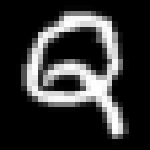

In [40]:
im.resize((150,150))

### Model Training

In [41]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model,Sequential
from keras.utils import np_utils
num_classes = 47
ytrain_one_hot = np_utils.to_categorical(ytrain, num_classes)
ytest_one_hot = np_utils.to_categorical(ytest, num_classes)
print ("ytrain:", ytrain_one_hot.shape)
print ("ytest:", ytest_one_hot.shape)

ytrain: (112800, 47)
ytest: (18800, 47)


In [43]:
# Normalizing data into scale of 0-1
xtrain/=255
xtest/=255

In [44]:
model = Sequential()
model.add(Dense(784, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(1024, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

In [45]:
ytrain_one_hot[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.])

In [46]:

model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

model.fit(xtrain.values, ytrain_one_hot, # Train the model using the training set...
          batch_size=512, epochs=10,
          verbose=2, validation_split=0.1) # ...holding out 10% of the data for validation

Train on 101520 samples, validate on 11280 samples
Epoch 1/10
33s - loss: 1.0825 - acc: 0.6873 - val_loss: 0.6485 - val_acc: 0.7882
Epoch 2/10
32s - loss: 0.5760 - acc: 0.8132 - val_loss: 0.5237 - val_acc: 0.8224
Epoch 3/10
32s - loss: 0.4597 - acc: 0.8444 - val_loss: 0.4888 - val_acc: 0.8302
Epoch 4/10
32s - loss: 0.3951 - acc: 0.8626 - val_loss: 0.4533 - val_acc: 0.8412
Epoch 5/10
32s - loss: 0.3497 - acc: 0.8757 - val_loss: 0.4513 - val_acc: 0.8478
Epoch 6/10
33s - loss: 0.3143 - acc: 0.8862 - val_loss: 0.4344 - val_acc: 0.8490
Epoch 7/10
33s - loss: 0.2853 - acc: 0.8942 - val_loss: 0.4606 - val_acc: 0.8417
Epoch 8/10
34s - loss: 0.2593 - acc: 0.9018 - val_loss: 0.4594 - val_acc: 0.8457
Epoch 9/10
34s - loss: 0.2396 - acc: 0.9093 - val_loss: 0.4612 - val_acc: 0.8455
Epoch 10/10
34s - loss: 0.2194 - acc: 0.9160 - val_loss: 0.4721 - val_acc: 0.8401


### Testing model

In [48]:
op = model.predict(xtest.values)
op_char = [mapping[np.array(op[i]).argmax(axis=0)] for i in range(len(op))]
ytest_char = [mapping[i] for i in ytest]
from sklearn.metrics import accuracy_score
print("accuracy on test dataset : ",accuracy_score(ytest_char,op_char)*100,"%")

accuracy on test dataset :  85.0531914894 %


In [93]:
xtest.values

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [49]:
#saving our ouput array and actual array to a file named result
file_ = open('result.txt','w')
file_.write("Actual Values :--> \n")
file_.write("[")
for i in ytest_char:
    file_.write(i+", ")
file_.write("]\n")
file_.write("Predicted Values : \n")
file_.write("[")
for i in op_char:
    file_.write(i+", ")
file_.write("]\n")
file_.write("Accuracy : "+str(accuracy_score(ytest_char,op_char)*100)+"%")
file_.close()

### Testing On custom Image input

In [104]:
xtrain.shape

(112800, 784)

In [181]:
import os
name_ = os.listdir("testing")
print("testing for this imag :",name_)
test_im = Image.open("testing/"+name_[0])
test_im_arr = np.array(test_im)
test_im_arr = np.transpose(test_im_arr)
temp_im_ = Image.fromarray(test_im_arr)
test_im_arr = test_im_arr.astype('float')/255.0
test_im_arr = test_im_arr.reshape((28*28))
test_im_arr = np.atleast_2d(test_im_arr)
#mapping[np.array(model.predict([test_im_arr])[0]).argmax(axis=0)]
opp = model.predict(test_im_arr)
print(np.array(opp[0]).argmax(axis=0))
mapping[np.array(opp[0]).argmax(axis=0)]

testing for this imag : ['J_13.png', 'Thumbs.db']
19


'J'

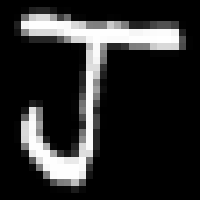

In [185]:
temp__ =Image.fromarray((test_im_arr.reshape((28,28))*255).astype('uint8').T)
temp__.resize((200,200))

### Confusion Matrix

In [144]:
len(ytest_char),len(op_char)

(18800, 18800)

In [145]:
# Saving Result To html file table for better representation
pd.crosstab([ytest_char],[op_char],rownames=['True'],colnames=['predicted'],margins=True).to_html("Confusion Matrix.html")